#Import Libraries

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
# from nltk.croups import stopwords

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchtext.data import get_tokenizer

In [3]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!pip install bcolz-zipline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.3 MB/s eta 0:00:00


In [5]:
from collections import Counter
import string
import re
import pickle
import bcolz

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Create Embeddings

In [8]:
folder_path = "/content/drive/MyDrive/Datasets/"
extracted_folder = "glove"
file_name = "glove.6B.zip"
zip_file_path = os.path.join(folder_path, file_name)

if not os.path.exists(zip_file_path):
    print("Downloading files...")
    !wget --no-check-certificate \
        http://nlp.stanford.edu/data/glove.6B.zip \
        -O {zip_file_path}

if not os.path.exists(os.path.join(folder_path, extracted_folder)):
    print("Extracting files...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.join(folder_path, extracted_folder))

print("Files are downloaded and extracted successfully")


Files are downloaded and extracted successfully


In [9]:
glove_path = os.path.join(folder_path, extracted_folder)
glove_path

'/content/drive/MyDrive/Datasets/glove'

In [10]:
words = []
idx = 2
word2idx = {}
embedding_dim =100
vectors = []
if not os.path.exists(f'{glove_path}/6B.100_words.pkl'):
  with open(f'{glove_path}/glove.6B.100d.txt', 'rb') as f:
      for l in f:
          line = l.decode().split()
          word = line[0]
          words.append(word)
          word2idx[word] = idx
          idx += 1
          vect = np.array(line[1:]).astype(float)
          vectors.append(vect)

  zero_embedding = np.zeros(embedding_dim)
  mean_embedding = np.mean(np.array(vectors), axis=0)

  vectors.insert(0,zero_embedding)
  vectors.insert(1,mean_embedding)

  word2idx = {'<pad>': 0, '<unk>': 1, **word2idx}
  words = ["<pad>", "<unk>"] + words

  pickle.dump(vectors, open(f'{glove_path}/6B.100.pkl', 'wb'))
  pickle.dump(words, open(f'{glove_path}/6B.100_words.pkl', 'wb'))
  pickle.dump(word2idx, open(f'{glove_path}/6B.100_idx.pkl', 'wb'))
  print("Vectors and word indexes are created")

vectors = pickle.load(open(f'{glove_path}/6B.100.pkl', 'rb'))
words = pickle.load(open(f'{glove_path}/6B.100_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.100_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}


In [11]:
word2idx['the']

2

In [12]:
words[:5]

['<pad>', '<unk>', 'the', ',', '.']

In [13]:
vectors[:3]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.05209832, -0.09711439, -0.13807563,  0.11075337, -0.02722767,
        -0.00326447,  0.03176378, -0.05076864,  0.15321645, -0.0236738 ,
        -0.00785526,  0.08436049, -0.08042014, -0.08836746, -0.01713613,
         0.07352562, -0.16472255,  0.0547354 ,  0.15367049, -0.05284022,
        -0.16474395, -0.00894904, -0.13604239, -0.0388938 , -0.09204607,
         0.0287463 ,  0.02445962,  0.19419303, -0.03298013,  0.00509294,
         0.01469035, -0.15542922,  0.03542781, -0.02936262,  0.01372898,
        -0.06067584,  0.02025397, -0.14

In [14]:
len(vectors)

400002

In [15]:
glove['<pad>']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
type(glove)

dict

In [17]:
len(glove)

400002

#Data Preperation

In [18]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/IMDB Dataset.csv/IMDB Dataset.csv")

In [19]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [20]:
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [21]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Data Cleaning

In [22]:

def clean_dataset(df):
    """
    Clean a DataFrame containing a 'review' column.
    Args:
    - df: DataFrame with a 'review' column containing text data.
    Returns:
    - df: DataFrame with the 'review' column replaced by cleaned text.
    """
    cleaned_reviews = []

    for text in df['review']:
        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text(" ")

        # Remove non-word characters and digits
        text = re.sub(r"[^\w\s.,]", '', text)
        text = re.sub(r"\d", '', text)

        # Convert to lowercase
        cleaned_text = text.lower()

        cleaned_reviews.append(cleaned_text)

    df['review'] = cleaned_reviews
    return df


cleaned_data = clean_dataset(df)


<ipython-input-22-3241355139a5>:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text(" ")


In [23]:
cleaned_data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming te...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


## Data Preprocessing

In [24]:
X,y = cleaned_data['review'].values,cleaned_data['sentiment'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)
print(f'shape of train data is {x_train.shape}')

shape of train data is (37500,)


In [25]:
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,train_size=0.5,random_state=42,stratify=y_test)
print(f'shape of validation data is {x_val.shape}')
print(f'shape of test data is {x_test.shape}')

shape of validation data is (6250,)
shape of test data is (6250,)


In [26]:
class CustomDataset(Dataset):
    def __init__(self, reviews, sentiments, word2idx, max_seq_length=500,tokenizer = None):
        self.reviews = reviews
        self.sentiments = sentiments
        self.word2idx = word2idx
        self.max_seq_length = max_seq_length
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, index):
        review = self.reviews[index]
        label = self.sentiments[index]

        # Tokenize and convert words to indices
        tokens = self.tokenizer(review)
        indices = [self.word2idx.get(token, 0) for token in tokens][:self.max_seq_length]

        # Pad or truncate to a fixed sequence length
        pad_length = self.max_seq_length - len(indices)
        indices += [0] * pad_length  # 0 is used for padding

        # Convert indices to integers
        indices = [int(idx) for idx in indices]

        # One hot encoding
        one_hot_label = F.one_hot(torch.tensor(label), num_classes=2)

        return torch.tensor(indices), one_hot_label.float()


In [27]:
tokenizer = get_tokenizer('basic_english')

In [28]:
# DataLoader for training data
train_dataset = CustomDataset(x_train, y_train, word2idx, max_seq_length=500, tokenizer=tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# DataLoader for validation data
val_dataset = CustomDataset(x_val, y_val, word2idx, max_seq_length=500, tokenizer=tokenizer)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

# DataLoader for testing data
test_dataset = CustomDataset(x_test, y_test, word2idx, max_seq_length=500, tokenizer=tokenizer)
test_loader = DataLoader(test_dataset)


In [29]:
# Just to see the training tensors
for batch_idx, (inputs, labels) in enumerate(train_loader):
    # Print or display a portion of the content
    print(f"Batch {batch_idx + 1} - Input shape: {inputs.shape}, Label shape: {labels.shape}")

    # Print the first few samples in the batch
    for i in range(min(2, inputs.size(0))):  # Displaying the first 2 samples in each batch
        print(f"  Input {i + 1}: {inputs[i]}, Label: {labels[i]}")

    # Stop after a few batches for demonstration purposes
    if batch_idx == 2:
        break


Batch 1 - Input shape: torch.Size([32, 500]), Label shape: torch.Size([32, 2])
  Input 1: tensor([   51,  2187,     2,  1941,     6,    39,  1007,     7,  2662,     2,
         2197,  3691,     3,    43,   849,    14,    43,    56,  1681,   194,
         1707,  1105,  1091,     6,   205,    43,   806,     2,   321,    17,
         4347,     3,    38,    93,     8,     2,  5099,  4284,     3,     2,
         1651,     3,   405,  1656,     3,  2052,     3,     7,  8046,     3,
           36,     8,  2222,   533,     2,   525,     5,  1971,  1148,     7,
            2,   588,    20,  4098,   133,   216,     5, 14038,     7, 10002,
           12,  8255,     8,  1535,     2,   181,    20,  1351,     7,  1524,
            6,    32,    28,  2820,     4,    43,   915,   193,  4782,     3,
         2749,     3,     6,    35,    42,     9,   359,   155,     8,  2823,
            2,   525,     5,    39,  5285,   302,     4,    43,  7548,  1404,
            6,   255,    39,    63,     2,  1541,  6

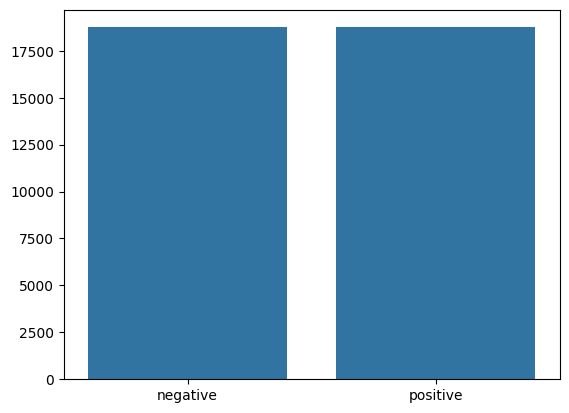

In [30]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

#Model

In [31]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_layer, hidden_size,
                 num_classes=2,
                 embedding_dim=100,
                 num_layers=2,
                 bidirectional=True,
                 dropout=0.1):
        super(LSTMClassifier, self).__init__()
        self.embedding = embedding_layer
        self.fc1 = nn.Sequential(
            nn.Linear(embedding_dim,embedding_dim),
            nn.ReLU(),
        )
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size,
                            num_layers = num_layers,
                            bidirectional = bidirectional,
                            dropout=dropout,
                            batch_first=True)

        self.fc2 = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
        )
        self.sig = nn.Sigmoid()

    def forward(self, input_indices):
        embedded = self.embedding(input_indices)
        fc1_output = self.fc1(embedded)
        lstm_out, _ = self.lstm(fc1_output)
        fc2_output = self.fc2(lstm_out[:, -1, :])
        output = self.sig(fc2_output)
        return output


In [32]:
def create_embedding(weight_dict, trainable=False):
    vocab_size, embedding_dim = len(weight_dict), len(next(iter(weight_dict.values())))

    # Initialize an embedding layer with random weights
    emb_layer = nn.Embedding(vocab_size, embedding_dim)

    # Load the pre-trained weights into the embedding layer
    emb_layer.weight.data.copy_(torch.tensor(list(weight_dict.values())))

    # Set requires_grad based on the trainable flag
    emb_layer.weight.requires_grad = trainable

    return emb_layer

In [33]:
embedding_layer = create_embedding(glove)

<ipython-input-32-919963caf68c>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  emb_layer.weight.data.copy_(torch.tensor(list(weight_dict.values())))


In [34]:
weights = embedding_layer.weight.data
print(weights)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0521, -0.0971, -0.1381,  ...,  0.1238, -0.2343, -0.0093],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 0.3609, -0.1692, -0.3270,  ...,  0.2714, -0.2919,  0.1611],
        [-0.1046, -0.5047, -0.4933,  ...,  0.4253, -0.5125, -0.1705],
        [ 0.2837, -0.6263, -0.4435,  ...,  0.4368, -0.8261, -0.1570]])


In [35]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU is used")

else:
    device = torch.device('cpu')
    print("GPU not available, CPU used")

GPU is used


In [36]:
hidden_dim = 128
output_dim = 2

In [37]:
# Create the custom model with the embedding layer
model = LSTMClassifier(embedding_layer, hidden_dim)

In [38]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [39]:
def match(output,label):
  prediction = int(torch.argmax(output))
  actual_label = int(torch.argmax(label))
  matched = False
  if prediction == actual_label:
    matched = True
  return matched


In [40]:
print(match(torch.tensor([1.5, 4.3, 3.1]),torch.tensor([0,1,0])))

True


In [41]:
def train(model,num_epochs,optimizer,loss_function,train_loader,validation_loader,device):
  model = model.to(device)
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      n_correct =0
      n_incorrect =0

      # Training Phase
      for batch_idx, (inputs, labels) in enumerate(train_loader):
          optimizer.zero_grad()
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          loss = loss_function(outputs, labels)
          loss.backward()
          optimizer.step()

          for label,output in zip(labels,outputs):
            if match(output,label):
              n_correct +=1
            else:
              n_incorrect+=1

          total_loss += loss.item()

      average_loss = total_loss / len(train_loader)
      total_accuracy = n_correct/(n_correct+n_incorrect)
      print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss  : {average_loss:.10f}, Training Accuracy  : {total_accuracy:.4f}")


      # Validation phase
      model.eval()
      val_loss = 0
      val_n_correct = 0
      val_n_incorrect = 0

      with torch.no_grad():
          for val_inputs, val_labels in validation_loader:
              val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
              val_outputs = model(val_inputs)
              val_loss += loss_function(val_outputs, val_labels).item()

              for val_label, val_output in zip(val_labels, val_outputs):
                  if match(val_output, val_label):
                      val_n_correct += 1
                  else:
                      val_n_incorrect += 1

      val_average_loss = val_loss / len(validation_loader)
      val_total_accuracy = val_n_correct / (val_n_correct + val_n_incorrect)

      print(f"Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_average_loss:.10f}, Validation Accuracy: {val_total_accuracy:.4f}")
      print()

  return model

In [42]:
trained_model = train(model,10,optimizer,criterion,train_loader,val_loader,device)

Epoch 1/10, Training Loss  : 0.6931025606, Training Accuracy  : 0.5061
Epoch 1/10, Validation Loss: 0.6928429018, Validation Accuracy: 0.5083

Epoch 2/10, Training Loss  : 0.6923840120, Training Accuracy  : 0.5083
Epoch 2/10, Validation Loss: 0.6930514403, Validation Accuracy: 0.5043

Epoch 3/10, Training Loss  : 0.6872031362, Training Accuracy  : 0.5289
Epoch 3/10, Validation Loss: 0.5840688495, Validation Accuracy: 0.7118

Epoch 4/10, Training Loss  : 0.4945873067, Training Accuracy  : 0.8125
Epoch 4/10, Validation Loss: 0.4736459040, Validation Accuracy: 0.8336

Epoch 5/10, Training Loss  : 0.4657799624, Training Accuracy  : 0.8418
Epoch 5/10, Validation Loss: 0.4554068692, Validation Accuracy: 0.8544

Epoch 6/10, Training Loss  : 0.4467322310, Training Accuracy  : 0.8599
Epoch 6/10, Validation Loss: 0.4431265134, Validation Accuracy: 0.8603

Epoch 7/10, Training Loss  : 0.4437501639, Training Accuracy  : 0.8642
Epoch 7/10, Validation Loss: 0.4513777040, Validation Accuracy: 0.8589


In [ ]:
# i=0
# model = model.to(device)
# model.train()
# for batch_idx, (inputs, labels) in enumerate(train_loader):
#   print(inputs,labels)
#   inputs, labels = inputs.to(device), labels.to(device)
#   outputs = model(inputs)
#   print(outputs)
#   i+=1
#   if i>=5:
#     break

In [54]:
def test(model, test_loader, device):
    model.eval()
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Make predictions
            # _, predicted = torch.max(outputs, 1)

            if match(outputs,labels):
              total_correct+=1
            total_samples+=1


    accuracy = total_correct / total_samples
    print(f'Testing Accuracy: {accuracy:.4f}')


In [55]:
test(trained_model,test_loader,device)

Testing Accuracy: 0.8667


In [56]:
# Save the model
model_path = '/content/drive/MyDrive/Models/lstm_imdb_model.pth'
torch.save(model.state_dict(), model_path)